In [11]:
import sympy as sp
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML, Math
import numpy as np

## Assignment 1

In [2]:
# a)

# 1: False
# 2: True
# 3: False
# 4: True
# 5: False
# 6: True
# 7: False
# 8: False
# 9: True

In [3]:
# b)
# 2 is True

In [7]:
# c)
# Invertible since it has 4 non-zero eigenvalues
# It is diagonalizable since it has 4 distinct eigenvalues
A = Matrix([2, -1, 3]).T
A.rref()

In [8]:
# d) Dim V = 3

## Assignment 2

In [9]:
a, b, x1, x2, x3 = symbols('a b x1 x2 x3')

In [12]:
# a)
A = Matrix([[-1, 3, 2], [1, 0, 1], [3, 3, a]])
A[1,0]*A.cofactor(1,0)+A[1,2]*A.cofactor(1,2)

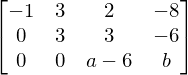

In [17]:
# b)
B = Matrix([-8, 2, b])
L, U, perm = A.row_join(B).LUdecomposition()
U

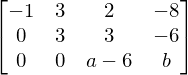

In [16]:
# So A != 6

In [18]:
# c) a = 6 and b != 0

# d) a = 6 and b = 0

## Assignment 3

In [3]:
A = Matrix([[1, -1, 3], [2, 1, 0], [-1, -5, 9]])
b = Matrix([1, 5, -7])
x, y, z = symbols('x y z')
var = Matrix([x, y, z])
display(Latex("$${}{} = {}$$".format(latex(A), latex(var), latex(b))))

<IPython.core.display.Latex object>

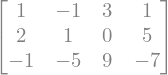

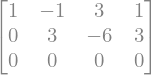

In [4]:
# b)
display(A.row_join(b))
L, U, perm = A.row_join(b).LUdecomposition()
display(U)

In [5]:
# c)
A.row_join(b).rref()
coef = Matrix([2, 1, 0])
display(Latex("$${} = {}+z{}$$".format(latex(var), latex(coef), latex(A.nullspace()[0]))))

<IPython.core.display.Latex object>

In [24]:
# d) A inverse does not exist since it has a free variable.

## Assignment 4

In [6]:
A = Matrix([[1,4], [3, 2]])

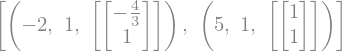

In [7]:
A = Matrix([[1,4], [3, 2]])

# a)

# First we check whether A is diagonalizable

vecs = A.eigenvects()
vecs

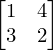

In [33]:
# Since it has distinct eigenvalues, it will be diagonalizable.
d1 = vecs[1][0]
d2 = vecs[0][0]
q1 = vecs[1][2][0]
q2 = vecs[0][2][0]
Q = q1.row_join(q2)
Qinv = Q**-1
D = diag(d1, d2)
Q*D*Qinv

In [14]:
# b)
# A^n = Q*D^n*Qinv
display(Math(r'A^n = Q\times D^n \times Q^{-1}'))

<IPython.core.display.Math object>

## Assignment 5

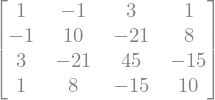

In [15]:
v1 = Matrix([1, 0, 0, 1])
x2 = Matrix([1, 0, 1, 1])
x3 = Matrix([3, 2, 1, 1])
v2 = x2-x2.project(v1)
v3 = x3-x3.project(v2)-x3.project(v1)
# So v1, v2 and v3 will now form an orthogonal basis for W.

# b)
u1 = v1.normalized()
u2 = v2.normalized()
u3 = v3.normalized()
display(U.T*U)
# So u1, u2, and u3 now form an orthonormal basis for W

## Assignment 6

In [36]:
from scipy.io import loadmat
Data = loadmat("TV_Viewing.mat")
Data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'X'])

In [77]:
import numpy as np
Mat = Matrix(Data['X'])
x = np.array(Mat[:,0])
y1 = np.array(Mat[:,1])
y = y1.astype(float)

In [67]:
# a) Design matrix for linear model

X1 = Matrix([ones(len(x),1)]).row_join(Matrix(x))
XtX = X1.T*X1
Xty = X1.T*Matrix(y)
Mat, _ = XtX.row_join(Xty).rref()
B1 = Mat[:,-1]
display(Latex("$$y_1(x) = {}+{}x$$".format(round(B1[0],2), round(B1[1], 4))))

<IPython.core.display.Latex object>

In [68]:
# a) Design matrix for quadratic model

X2 = Matrix([ones(len(x),1)]).row_join(Matrix(x)).row_join(Matrix(x**2))
XtX = X2.T*X2
Xty = X2.T*Matrix(y)
Mat, _ = XtX.row_join(Xty).rref()
B2 = Mat[:,-1]
display(Latex("$$y_2(x) = {}+{}x+{}x^2$$"
              .format(round(B2[0],2), round(B2[1], 4), round(B2[2], 4))))

<IPython.core.display.Latex object>

In [78]:
# b)

display(Latex(
    "The error of the linear model is {}, and the error of the quadratic is model {}."
    " We conclude that the quadratic model has the best fit for this specific data."
    .format(round((y-X1*B1).norm(), 2), round((y-X2*B2).norm(), 2))))

<IPython.core.display.Latex object>

## Assignment 7

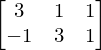

In [79]:
A = Matrix([[3, 1, 1], [-1, 3, 1]])
A

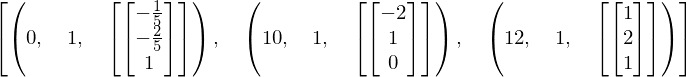

In [82]:
AtA = A.T*A
vecs = AtA.eigenvects()
vecs

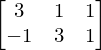

In [88]:
s1 = sqrt(vecs[2][0])
s2 = sqrt(vecs[1][0])
v1 = vecs[2][2][0].normalized()
v2 = vecs[1][2][0].normalized()
v3 = vecs[0][2][0].normalized()
u1 = (s1**-1)*A*v1
u2 = (s2**-1)*A*v2
U = u1.row_join(u2)
V = v1.row_join(v2).row_join(v3)
Vt = V.T
S = Matrix(diag(s1, s2)).row_join(zeros(2,1))
U*S*Vt